In [1]:
from datetime import date
import statistics
import os

import pandas as pd
from pandas.plotting import table 
import matplotlib.pyplot as plt
import matplotlib.table as table
import seaborn as sns

In [8]:
repos = pd.read_csv("results/repositories_filtered_2021-11-04.csv")
export_path_graphs = "../graphs/"

## Filtering for research groups or private users only

In [4]:
users = pd.read_excel("../collect_users/results/unique_users_annotated.xlsx")

In [5]:
def add_research_group_filter(dataset):
    user_is_research_group = []
    for row in dataset.iterrows():
        try:
            owner = row[1]['owner']
        except:
            owner = row[1]['html_url_repository'].split('/')[-2]
            
            
      
        row_users = users.loc[users['user_id'] == owner]
        if len(row_users['is_research_group']) == 0:
            user_is_research_group.append(False)
        for i in row_users['is_research_group']:
            if i == 1:
                user_is_research_group.append(True)
                break
            else:
                user_is_research_group.append(False)
                break
                    
    return user_is_research_group
    

In [7]:
repos['is_research_group'] = add_research_group_filter(repos)

## Run to filter for only private users

In [6]:
repos = repos[~repos['is_research_group']]
export_path_graphs = '../private_user_graphs/'

## Run to filter for only research groups

In [7]:
repos = repos[repos['is_research_group']]
export_path_graphs = '../research_group_graphs/'

### Run to create folders if they don't exist

In [9]:
if not os.path.isdir(export_path_graphs):
    os.makedirs(export_path_graphs)

## Datasets

Using the github API, we collected data on the repositories. 

In [10]:
repos

,id,node_id,name,full_name,private,owner,html_url,description,fork,url,...,allow_forking,is_template,topics,visibility,forks,open_issues,watchers,default_branch,permissions,score
0,307429416,MDEwOlJlcG9zaXRvcnkzMDc0Mjk0MTY=,fastlogitME,M-thieu/fastlogitME,False,M-thieu,https://github.com/M-thieu/fastlogitME,Fast but Basic Marginal Effects for Logit Mode...,False,https://api.github.com/repos/M-thieu/fastlogitME,...,True,False,[],public,0,0,0,master,NaN,1.0
1,73220408,MDEwOlJlcG9zaXRvcnk3MzIyMDQwOA==,Seattle-Feature-Service,bricker0/Seattle-Feature-Service,False,bricker0,https://github.com/bricker0/Seattle-Feature-Se...,Here I explain how to call Seattle Open Data E...,False,https://api.github.com/repos/bricker0/Seattle-...,...,True,False,[],public,0,0,2,master,NaN,1.0
2,259872452,MDEwOlJlcG9zaXRvcnkyNTk4NzI0NTI=,choropleth_map,bricker0/choropleth_map,False,bricker0,https://github.com/bricker0/choropleth_map,How to make a choropleth map using SDG indicat...,False,https://api.github.com/repos/bricker0/chorople...,...,True,False,[],public,0,0,1,master,NaN,1.0
3,112259672,MDEwOlJlcG9zaXRvcnkxMTIyNTk2NzI=,Live_Earthquake_Feed,bricker0/Live_Earthquake_Feed,False,bricker0,https://github.com/bricker0/Live_Earthquake_Feed,Want to make one of those snazzy live Earthqua...,False,https://api.github.com/repos/bricker0/Live_Ear...,...,True,False,[],public,0,0,0,master,NaN,1.0
4,51859197,MDEwOlJlcG9zaXRvcnk1MTg1OTE5Nw==,MyLocation,bricker0/MyLocation,False,bricker0,https://github.com/bricker0/MyLocation,Lab 3,False,https://api.github.com/repos/bricker0/MyLocation,...,True,False,[],public,0,0,0,master,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1390,343524205,MDEwOlJlcG9zaXRvcnkzNDM1MjQyMDU=,nlreferences,growthcharts/nlreferences,False,growthcharts,https://github.com/growthcharts/nlreferences,Growth References for Children living in The N...,False,https://api.github.com/repos/growthcharts/nlre...,...,True,False,"['growth-curves', 'netherlands', 'rif-format']",public,0,0,0,master,NaN,1.0
1391,197332693,MDEwOlJlcG9zaXRvcnkxOTczMzI2OTM=,jamesdemo,growthcharts/jamesdemo,False,growthcharts,https://github.com/growthcharts/jamesdemo,Shiny application to show JAMES site,False,https://api.github.com/repos/growthcharts/jame...,...,True,False,"['anthropometry', 'growth-charts', 'growth-cur...",public,0,0,0,master,NaN,1.0
1392,202419857,MDEwOlJlcG9zaXRvcnkyMDI0MTk4NTc=,growthscreener,growthcharts/growthscreener,False,growthcharts,https://github.com/growthcharts/growthscreener,Finding Children with Unusual Growth Patterns,False,https://api.github.com/repos/growthcharts/grow...,...,True,False,"['growth-charts', 'growth-curves', 'growth-sta...",public,0,0,0,master,NaN,1.0
1393,76050143,MDEwOlJlcG9zaXRvcnk3NjA1MDE0Mw==,curvematching,growthcharts/curvematching,False,growthcharts,https://github.com/growthcharts/curvematching,Personalised Prediction by Matching Invididuals,False,https://api.github.com/repos/growthcharts/curv...,...,True,False,['james-server'],public,0,0,0,master,NaN,1.0


In [11]:
print("The repository data from Github contains the following columns:")
print(repos.columns)

The repository data from Github contains the following columns:
Index(['id', 'node_id', 'name', 'full_name', 'private', 'owner', 'html_url',
       'description', 'fork', 'url', 'forks_url', 'keys_url',
       'collaborators_url', 'teams_url', 'hooks_url', 'issue_events_url',
       'events_url', 'assignees_url', 'branches_url', 'tags_url', 'blobs_url',
       'git_tags_url', 'git_refs_url', 'trees_url', 'statuses_url',
       'languages_url', 'stargazers_url', 'contributors_url',
       'subscribers_url', 'subscription_url', 'commits_url', 'git_commits_url',
       'comments_url', 'issue_comment_url', 'contents_url', 'compare_url',
       'merges_url', 'archive_url', 'downloads_url', 'issues_url', 'pulls_url',
       'milestones_url', 'notifications_url', 'labels_url', 'releases_url',
       'deployments_url', 'created_at', 'updated_at', 'pushed_at', 'git_url',
       'ssh_url', 'clone_url', 'svn_url', 'homepage', 'size',
       'stargazers_count', 'watchers_count', 'language', 'has_i

## Repositories mentioning Open Science

Because this project is related to open science, we wanted to investigate how many repositories mentoin open science in their description

In [12]:
open_count = 0
for description in repos["description"]:
    if "open" in str(description).lower():
        #print(description)
        open_count +=1
print("{} repositories contain the word 'open', often related to either open data or open source projects".format(open_count))

19 repositories contain the word 'open', often related to either open data or open source projects


## Stargazers

Stargazers represent the amount of people that have 'starred' a Github project. Starring a project can indicate that a user likes the project. It can also be used to bookmark a project, since starred projects are saved. The amount of stargazers can be used as a metric to measure popularity. 

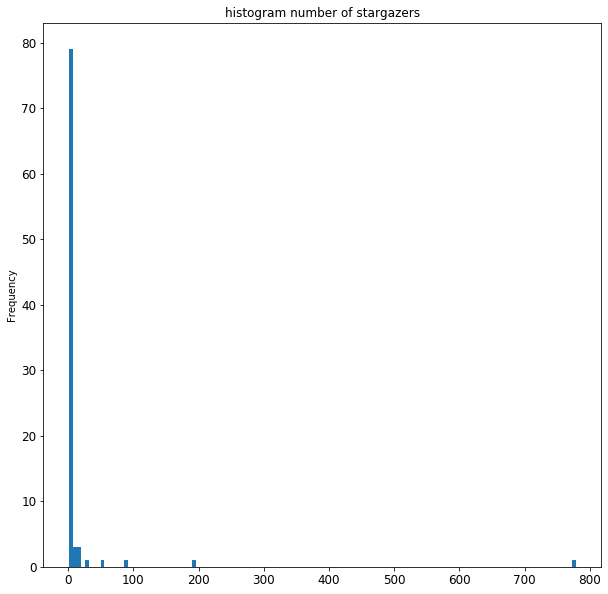

In [47]:
repos['stargazers_count'].value_counts().plot(kind = 'hist' , figsize = (10,10), fontsize = 12, title = 'histogram number of stargazers', bins = 128)
plt.savefig(export_path_graphs + '/stargazers.png')


In [48]:
repos.nlargest(10, 'stargazers_count')

,id,node_id,name,full_name,private,owner,html_url,description,fork,url,...,open_issues_count,license,topics,forks,open_issues,watchers,default_branch,permissions,score,is_research_group
941,8043756,MDEwOlJlcG9zaXRvcnk4MDQzNzU2,stan,stan-dev/stan,False,stan-dev,https://github.com/stan-dev/stan,Stan development repository. The master branch...,False,https://api.github.com/repos/stan-dev/stan,...,162,"BSD 3-Clause ""New"" or ""Revised"" License","['bayesian-methods', 'bayesian', 'bayesian-inf...",331,162,2053,develop,NaN,1.0,False
942,10256919,MDEwOlJlcG9zaXRvcnkxMDI1NjkxOQ==,pystan2,stan-dev/pystan2,False,stan-dev,https://github.com/stan-dev/pystan2,"PyStan, the Python interface to Stan",False,https://api.github.com/repos/stan-dev/pystan2,...,0,GNU General Public License v3.0,"['python', 'machine-learning', 'statistics', '...",192,0,915,develop,NaN,1.0,False
943,10229211,MDEwOlJlcG9zaXRvcnkxMDIyOTIxMQ==,rstan,stan-dev/rstan,False,stan-dev,https://github.com/stan-dev/rstan,"RStan, the R interface to Stan",False,https://api.github.com/repos/stan-dev/rstan,...,262,NaN,"['r', 'bayesian-inference', 'stan', 'r-package...",229,262,774,develop,NaN,1.0,False
944,22768481,MDEwOlJlcG9zaXRvcnkyMjc2ODQ4MQ==,example-models,stan-dev/example-models,False,stan-dev,https://github.com/stan-dev/example-models,Example models for Stan,False,https://api.github.com/repos/stan-dev/example-...,...,49,NaN,[],421,49,639,master,NaN,1.0,False
836,196186770,MDEwOlJlcG9zaXRvcnkxOTYxODY3NzA=,lighthouse2,jbikker/lighthouse2,False,jbikker,https://github.com/jbikker/lighthouse2,Lighthouse 2 framework for real-time ray tracing,False,https://api.github.com/repos/jbikker/lighthouse2,...,5,Apache License 2.0,"['gamedev', 'real-time', 'opengl', 'game-engin...",45,5,556,master,NaN,1.0,False
175,44471657,MDEwOlJlcG9zaXRvcnk0NDQ3MTY1Nw==,recordlinkage,J535D165/recordlinkage,False,J535D165,https://github.com/J535D165/recordlinkage,A toolkit for record linkage and duplicate det...,False,https://api.github.com/repos/J535D165/recordli...,...,46,"BSD 3-Clause ""New"" or ""Revised"" License","['python', 'machine-learning', 'privacy', 'ded...",92,46,546,master,NaN,1.0,False
945,38388440,MDEwOlJlcG9zaXRvcnkzODM4ODQ0MA==,math,stan-dev/math,False,stan-dev,https://github.com/stan-dev/math,The Stan Math Library is a C++ template librar...,False,https://api.github.com/repos/stan-dev/math,...,240,"BSD 3-Clause ""New"" or ""Revised"" License","['math', 'cpp', 'boost', 'automatic-differenti...",148,240,507,develop,NaN,1.0,False
452,101316174,MDEwOlJlcG9zaXRvcnkxMDEzMTYxNzQ=,mosdepth,brentp/mosdepth,False,brentp,https://github.com/brentp/mosdepth,"fast BAM/CRAM depth calculation for WGS, exome...",False,https://api.github.com/repos/brentp/mosdepth,...,26,MIT License,"['coverage', 'nim', 'genome', 'sequencing', 'd...",68,26,385,master,NaN,1.0,False
946,11455249,MDEwOlJlcG9zaXRvcnkxMTQ1NTI0OQ==,rstanarm,stan-dev/rstanarm,False,stan-dev,https://github.com/stan-dev/rstanarm,rstanarm R package for Bayesian applied regres...,False,https://api.github.com/repos/stan-dev/rstanarm,...,124,GNU General Public License v3.0,"['r', 'bayesian-methods', 'rstan', 'bayesian',...",101,124,289,master,NaN,1.0,False
947,59324359,MDEwOlJlcG9zaXRvcnk1OTMyNDM1OQ==,bayesplot,stan-dev/bayesplot,False,stan-dev,https://github.com/stan-dev/bayesplot,bayesplot R package for plotting Bayesian models,False,https://api.github.com/repos/stan-dev/bayesplot,...,59,GNU General Public License v3.0,"['visualization', 'ggplot2', 'pandoc', 'bayesi...",67,59,284,master,NaN,1.0,False


## Watchers

Watchers receive  notifications about project activity.

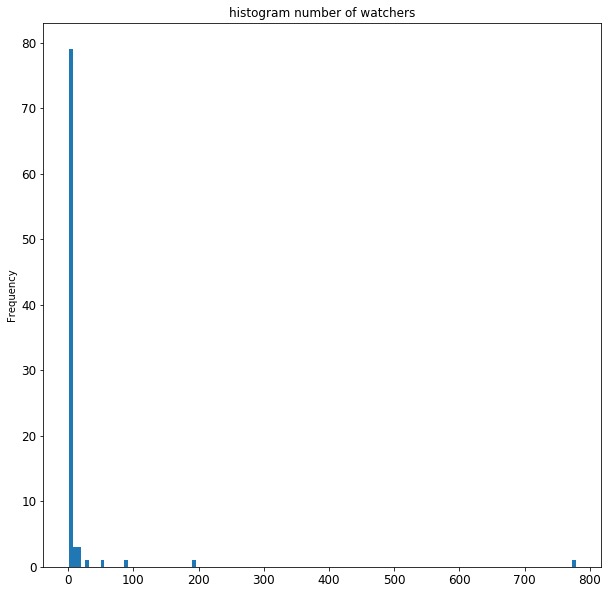

In [49]:
repos['watchers_count'].value_counts().plot(kind = 'hist' , figsize = (10,10), fontsize = 12, title = 'histogram number of watchers', bins = 128)
plt.savefig(export_path_graphs + '/watchers.png')


In [50]:
repos.nlargest(10, 'watchers_count')

,id,node_id,name,full_name,private,owner,html_url,description,fork,url,...,open_issues_count,license,topics,forks,open_issues,watchers,default_branch,permissions,score,is_research_group
941,8043756,MDEwOlJlcG9zaXRvcnk4MDQzNzU2,stan,stan-dev/stan,False,stan-dev,https://github.com/stan-dev/stan,Stan development repository. The master branch...,False,https://api.github.com/repos/stan-dev/stan,...,162,"BSD 3-Clause ""New"" or ""Revised"" License","['bayesian-methods', 'bayesian', 'bayesian-inf...",331,162,2053,develop,NaN,1.0,False
942,10256919,MDEwOlJlcG9zaXRvcnkxMDI1NjkxOQ==,pystan2,stan-dev/pystan2,False,stan-dev,https://github.com/stan-dev/pystan2,"PyStan, the Python interface to Stan",False,https://api.github.com/repos/stan-dev/pystan2,...,0,GNU General Public License v3.0,"['python', 'machine-learning', 'statistics', '...",192,0,915,develop,NaN,1.0,False
943,10229211,MDEwOlJlcG9zaXRvcnkxMDIyOTIxMQ==,rstan,stan-dev/rstan,False,stan-dev,https://github.com/stan-dev/rstan,"RStan, the R interface to Stan",False,https://api.github.com/repos/stan-dev/rstan,...,262,NaN,"['r', 'bayesian-inference', 'stan', 'r-package...",229,262,774,develop,NaN,1.0,False
944,22768481,MDEwOlJlcG9zaXRvcnkyMjc2ODQ4MQ==,example-models,stan-dev/example-models,False,stan-dev,https://github.com/stan-dev/example-models,Example models for Stan,False,https://api.github.com/repos/stan-dev/example-...,...,49,NaN,[],421,49,639,master,NaN,1.0,False
836,196186770,MDEwOlJlcG9zaXRvcnkxOTYxODY3NzA=,lighthouse2,jbikker/lighthouse2,False,jbikker,https://github.com/jbikker/lighthouse2,Lighthouse 2 framework for real-time ray tracing,False,https://api.github.com/repos/jbikker/lighthouse2,...,5,Apache License 2.0,"['gamedev', 'real-time', 'opengl', 'game-engin...",45,5,556,master,NaN,1.0,False
175,44471657,MDEwOlJlcG9zaXRvcnk0NDQ3MTY1Nw==,recordlinkage,J535D165/recordlinkage,False,J535D165,https://github.com/J535D165/recordlinkage,A toolkit for record linkage and duplicate det...,False,https://api.github.com/repos/J535D165/recordli...,...,46,"BSD 3-Clause ""New"" or ""Revised"" License","['python', 'machine-learning', 'privacy', 'ded...",92,46,546,master,NaN,1.0,False
945,38388440,MDEwOlJlcG9zaXRvcnkzODM4ODQ0MA==,math,stan-dev/math,False,stan-dev,https://github.com/stan-dev/math,The Stan Math Library is a C++ template librar...,False,https://api.github.com/repos/stan-dev/math,...,240,"BSD 3-Clause ""New"" or ""Revised"" License","['math', 'cpp', 'boost', 'automatic-differenti...",148,240,507,develop,NaN,1.0,False
452,101316174,MDEwOlJlcG9zaXRvcnkxMDEzMTYxNzQ=,mosdepth,brentp/mosdepth,False,brentp,https://github.com/brentp/mosdepth,"fast BAM/CRAM depth calculation for WGS, exome...",False,https://api.github.com/repos/brentp/mosdepth,...,26,MIT License,"['coverage', 'nim', 'genome', 'sequencing', 'd...",68,26,385,master,NaN,1.0,False
946,11455249,MDEwOlJlcG9zaXRvcnkxMTQ1NTI0OQ==,rstanarm,stan-dev/rstanarm,False,stan-dev,https://github.com/stan-dev/rstanarm,rstanarm R package for Bayesian applied regres...,False,https://api.github.com/repos/stan-dev/rstanarm,...,124,GNU General Public License v3.0,"['r', 'bayesian-methods', 'rstan', 'bayesian',...",101,124,289,master,NaN,1.0,False
947,59324359,MDEwOlJlcG9zaXRvcnk1OTMyNDM1OQ==,bayesplot,stan-dev/bayesplot,False,stan-dev,https://github.com/stan-dev/bayesplot,bayesplot R package for plotting Bayesian models,False,https://api.github.com/repos/stan-dev/bayesplot,...,59,GNU General Public License v3.0,"['visualization', 'ggplot2', 'pandoc', 'bayesi...",67,59,284,master,NaN,1.0,False


## Has issues

Boolean stating whether a repository allows users to address issues. An issue is way to keep track of the tasks, enchantments and bugs of the project. They can be discussed in a thread by users and developers. Each repository can enable their own issue page. An issue can be open, for example when a new bug is found, or closed, when it is solved. 

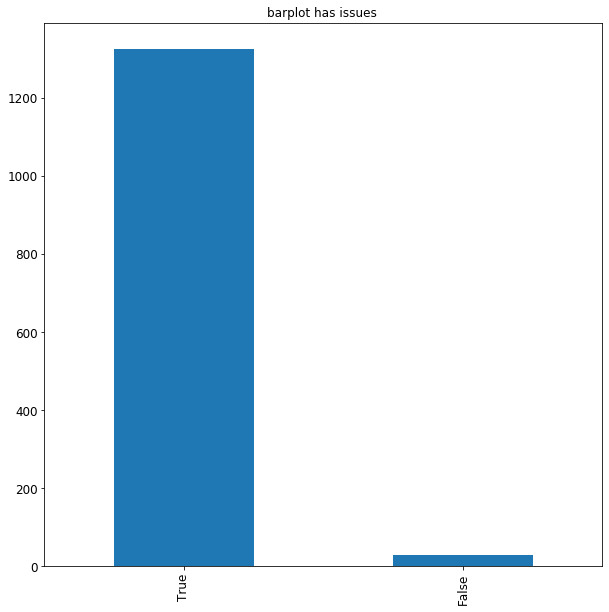

In [51]:
repos['has_issues'].value_counts().plot(kind = 'bar' , figsize = (10,10), fontsize = 12, title = 'barplot has issues ')
plt.savefig(export_path_graphs + '/has_issues.png')

## Open issues

The amount of open issues a repository has

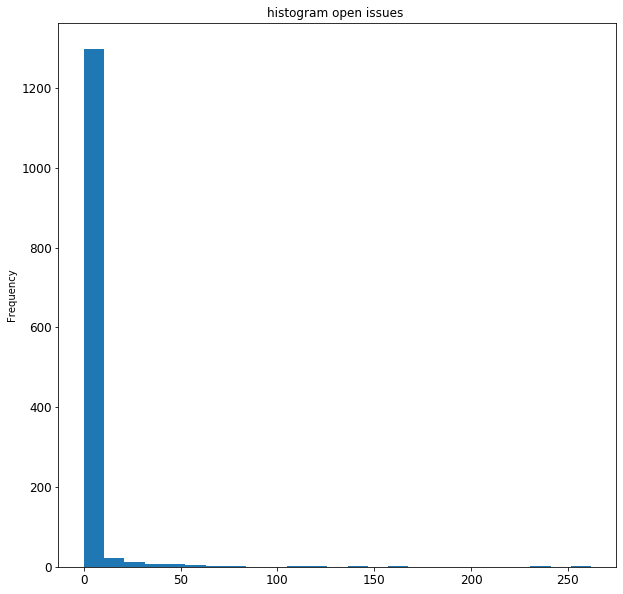

In [52]:
repos['open_issues'].plot(kind = 'hist' , figsize = (10,10), fontsize = 12, title = 'histogram open issues ', bins = 25)
plt.savefig(export_path_graphs + '/open_issues.png')

## Fork count

A fork is a copy of a repository for another user.

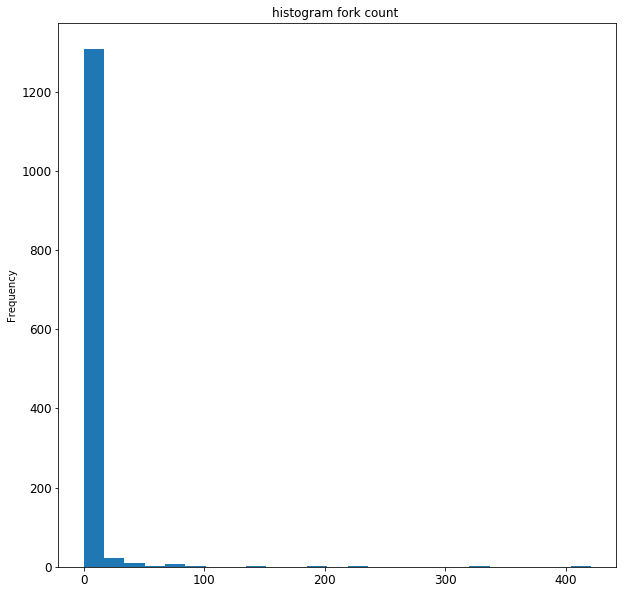

In [53]:
repos['forks'].plot(kind = 'hist' , figsize = (10,10), fontsize = 12, title = 'histogram fork count ', bins = 25)
plt.savefig(export_path_graphs + '/fork_count.png')

## default branch

The default branch is the standard branch of a repository.

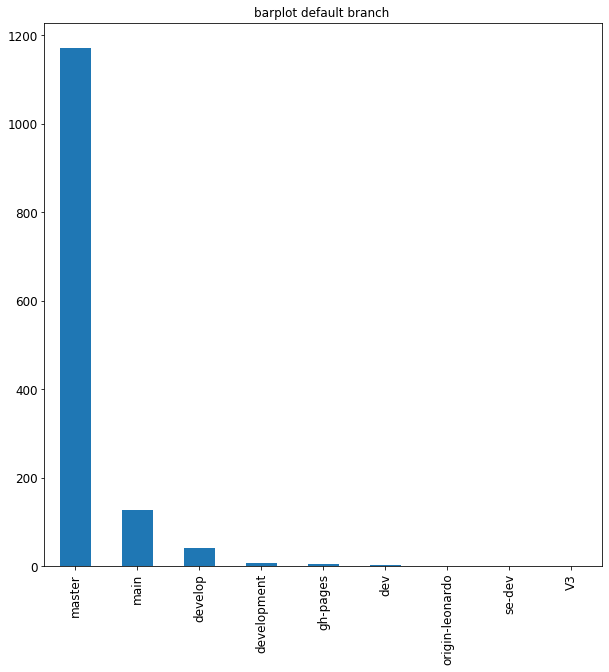

In [54]:
repos['default_branch'].value_counts().plot(kind = 'bar' , figsize = (10,10), fontsize = 12, title = 'barplot default branch ')
plt.savefig(export_path_graphs + '/default_branch.png')

## Homepage

The homepage is often the personal website of the research group or user. 

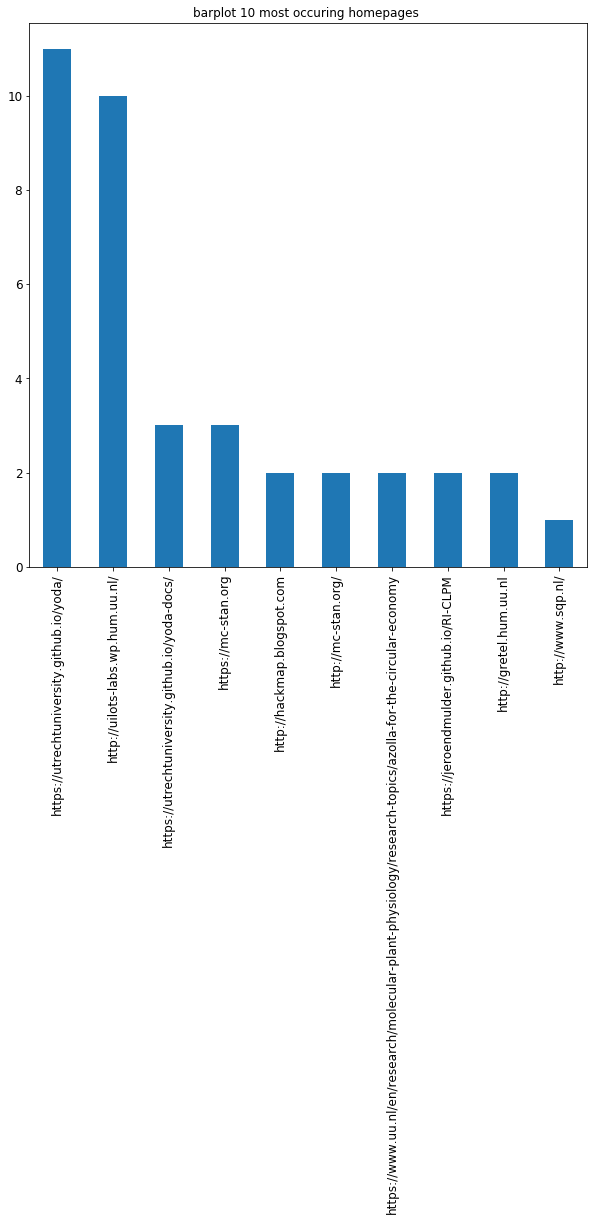

In [55]:
repos['homepage'].value_counts().nlargest(10).plot(kind = 'bar' , figsize = (10,10), fontsize = 12, title = 'barplot 10 most occuring homepages ')
plt.savefig(export_path_graphs + '/homepage_10_most_occuring.png')

## most recent commits 

If a repository is really active, we expect them to be more FAIR. As stated, a higher FAIR score implies a repository that is easier to find and work with.

In [13]:
months_ago_most_recent_commit =[]
today = str(date.today())
split_today = today.split('-')
for date_item in repos['updated_at']:
    split_date = date_item.split('-')
    years_ago = int(split_today[0]) - int(split_date[0])
    months_ago = 12 * years_ago + (int(split_today[1]) - int(split_date[1]))
    months_ago_most_recent_commit.append(months_ago)
repos['months_ago_most_recent_commit'] = months_ago_most_recent_commit

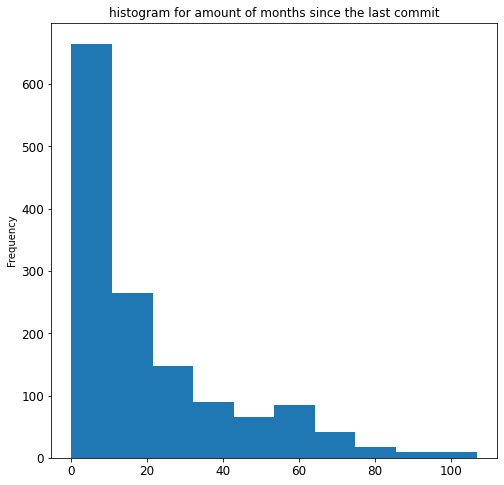

In [14]:
repos['months_ago_most_recent_commit'].plot(kind = 'hist', figsize = (8,8), fontsize = 12, title = 'histogram for amount of months since the last commit') #Add x-axis months ago
plt.savefig(export_path_graphs + '/most_recent_commit_months.png')

In [15]:
print('mean contributors: {:.1f}'.format(statistics.mean(repos['months_ago_most_recent_commit'])))
print('median contributors: {}'.format(statistics.median(repos['months_ago_most_recent_commit'])))


mean contributors: 20.3
median contributors: 12
